<a href="https://colab.research.google.com/github/tombraganca/Inteligente-Artificial/blob/main/Fuzzy_Python_da_Gorjeta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=d945512ddd079ea8f0036214cfe02a1ea7ef5ab712bc17007725428a4c8c875a
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [4]:
#Criando as variáveis
qualidade_da_comida = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade_da_comida')
atendimento = ctrl.Antecedent(np.arange(0, 11, 1), 'atendimento')
gorjeta = ctrl.Consequent(np.arange(0, 31, 1), 'gorjeta')

qualidade_da_comida.automf(names=['Ruim', 'Excelente'])

In [5]:
#Criando as funções de pertinência
atendimento['Ruim'] = fuzz.gaussmf(atendimento.universe, 0, 1.25)
atendimento['Bom'] = fuzz.gaussmf(atendimento.universe, 5, 1.25)
atendimento['Excelente'] = fuzz.smf(atendimento.universe, 5, 10)

qualidade_da_comida['Ruim'] = fuzz.trapmf(qualidade_da_comida.universe, [0, 0, 1.25, 3.75])
qualidade_da_comida['Excelente'] = fuzz.trapmf(qualidade_da_comida.universe, [6.25, 8.75, 10, 10])

gorjeta['Baixa'] = fuzz.trimf(gorjeta.universe, [0, 5, 10])
gorjeta['Média'] = fuzz.trimf(gorjeta.universe, [10, 15, 20])
gorjeta['Alta'] = fuzz.trimf(gorjeta.universe, [20, 25, 30])



In [6]:
#Criando as regras e o controle
rule1 = ctrl.Rule(atendimento['Excelente'] | qualidade_da_comida['Excelente'], gorjeta['Alta'])
rule2 = ctrl.Rule(atendimento['Bom'], gorjeta['Média'])
rule3 = ctrl.Rule(atendimento['Ruim'] & qualidade_da_comida['Ruim'], gorjeta['Baixa'])


In [7]:
gorjeta_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
gorjeta_simulador = ctrl.ControlSystemSimulation(gorjeta_ctrl)


In [8]:

#Selecionando as entradas
gorjeta_simulador.input['qualidade_da_comida'] = 3.5
gorjeta_simulador.input['atendimento'] = 1.0


In [9]:
#Mostrando a saída e os gráficos
gorjeta_simulador.compute()
print("Gorjeta = R$ {}".format(gorjeta_simulador.output['gorjeta']))


Gorjeta = R$ 5.411736712275512


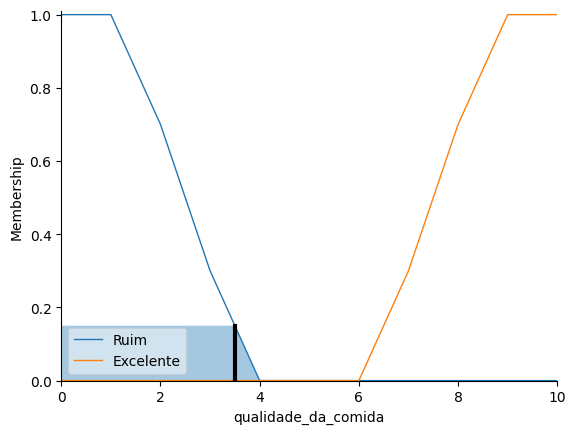

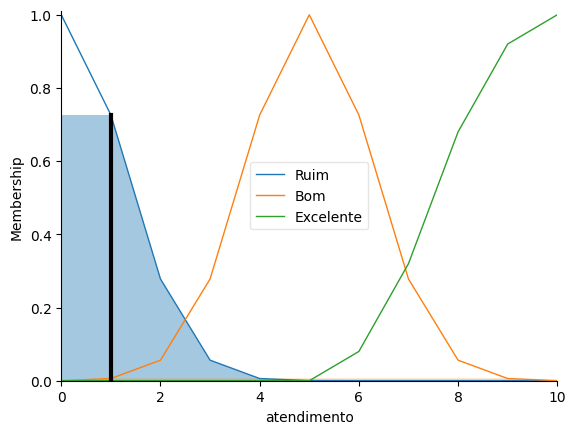

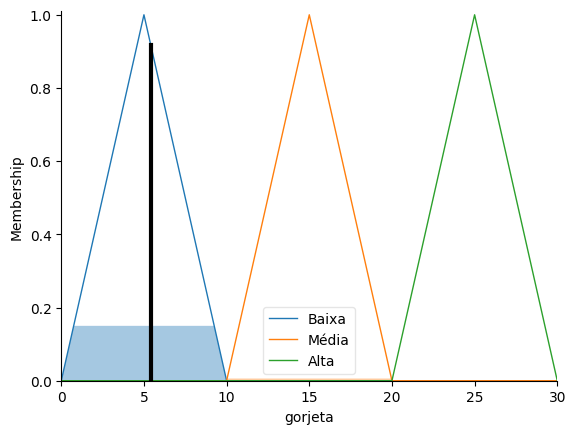

In [10]:
qualidade_da_comida.view(sim=gorjeta_simulador)
atendimento.view(sim=gorjeta_simulador)
gorjeta.view(sim=gorjeta_simulador)
